<a href="https://colab.research.google.com/github/fralfaro/MAT281/blob/main/docs/labs/lab_09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# MAT281 - Laboratorio N°09

**Objetivo**: Aplicar un flujo completo de **Machine Learning supervisado** para la clasificación de tumores mamarios, utilizando técnicas de preprocesamiento, reducción de dimensionalidad y modelos de clasificación con optimización de hiperparámetros.

> **Nota**: Puede ayudarse de algún asistente virtual como **ChatGPT, Gemini** u otros, así como del autocompletado de **Google Colab**, para avanzar en este laboratorio debido a su extensión.





<img src="https://www.svgrepo.com/show/1064/virus.svg" width = "300" align="center"/>



El **cáncer de mama** es una enfermedad caracterizada por la proliferación maligna de células epiteliales en los conductos o lobulillos mamarios. Surge cuando una célula acumula mutaciones que le otorgan la capacidad de dividirse de manera descontrolada, lo que da origen a un tumor. Este tumor puede permanecer localizado o, en casos más agresivos, invadir tejidos cercanos y propagarse a otras partes del organismo mediante metástasis.

El conjunto de datos **`BC.csv`** recopila información clínica y morfológica de pacientes con tumores mamarios, clasificados como **benignos** o **malignos**. Las características se obtienen a partir de imágenes digitalizadas de aspirados con aguja fina (FNA, por sus siglas en inglés) de masas mamarias. Dichas variables describen aspectos cuantitativos de los **núcleos celulares**, como su tamaño, forma, textura y homogeneidad.

Este tipo de información es fundamental para la detección temprana y clasificación de tumores, ya que permite entrenar modelos de **machine learning** capaces de apoyar el diagnóstico y diferenciar entre tumores benignos y malignos con mayor precisión.

A continuación, se procederá a cargar y explorar el conjunto de datos:



In [2]:
# Importar librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importar herramientas de Scikit-learn
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Configuración de gráficos
%matplotlib inline
sns.set_palette("deep", desat=0.6)
sns.set(rc={'figure.figsize': (11.7, 8.27)})

# Cargar y preparar los datos
df = pd.read_csv("https://raw.githubusercontent.com/fralfaro/MAT281/main/docs/labs/data/BC.csv")
df.set_index('id', inplace=True)

# Transformación de la variable objetivo
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0}).astype(int)

# Visualizar las primeras filas del DataFrame
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678



Con base en la información presentada, resuelva las siguientes tareas. Asegúrese de:

* Incluir el **código necesario** para ejecutar cada análisis.
* Explicar de manera **clara y fundamentada** los resultados obtenidos.
* Describir el **proceso seguido**, justificando las decisiones tomadas en cada etapa (preprocesamiento, elección de técnicas y parámetros, interpretación de resultados).





1. **Análisis exploratorio profundo (EDA):**

   * Examine la distribución de las variables, identifique valores atípicos y analice la correlación entre características.
   * Visualice las diferencias más relevantes entre tumores **benignos** y **malignos** utilizando gráficos adecuados (boxplots, histogramas, mapas de calor).
   * Discuta qué variables parecen tener mayor capacidad discriminativa.


Dimensiones del dataset: (569, 31)

Primeras filas:


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678



Información general:
<class 'pandas.core.frame.DataFrame'>
Index: 569 entries, 842302 to 92751
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  ar

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


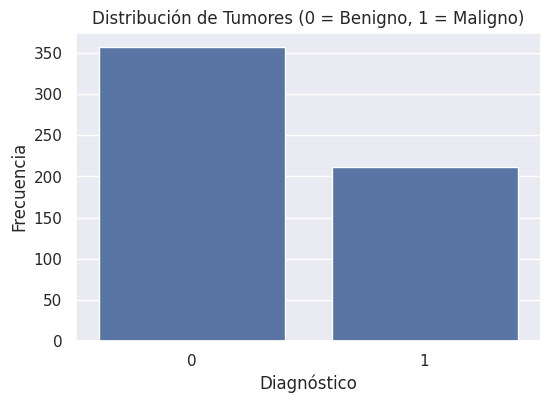

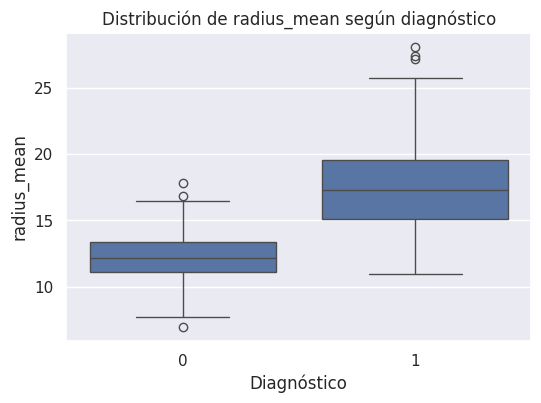

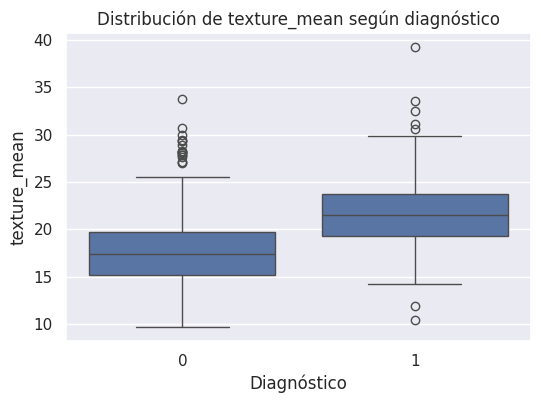

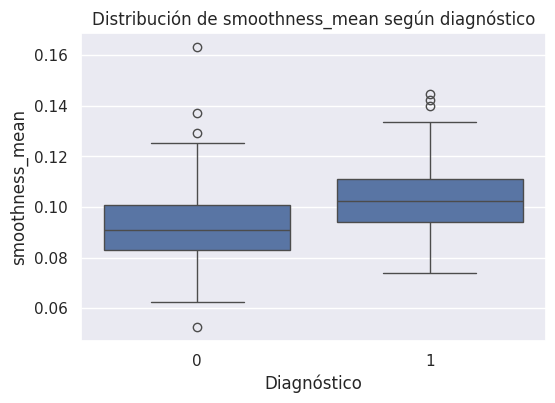

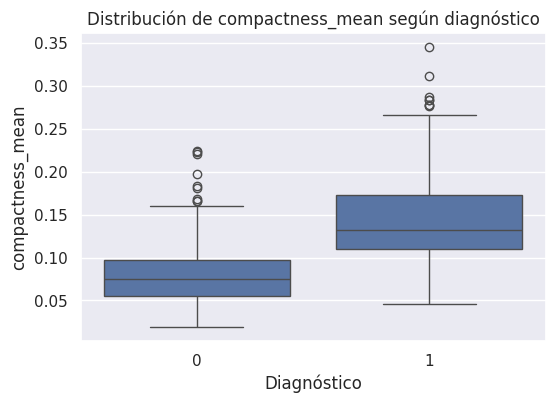

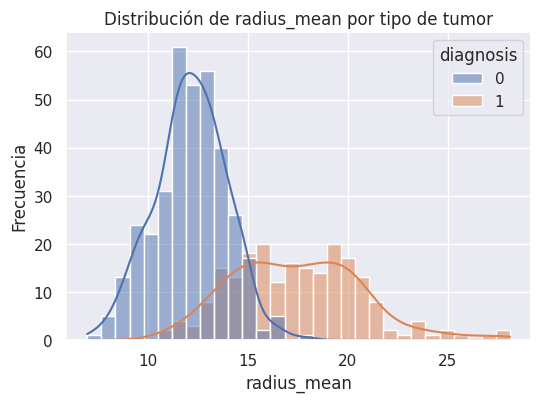

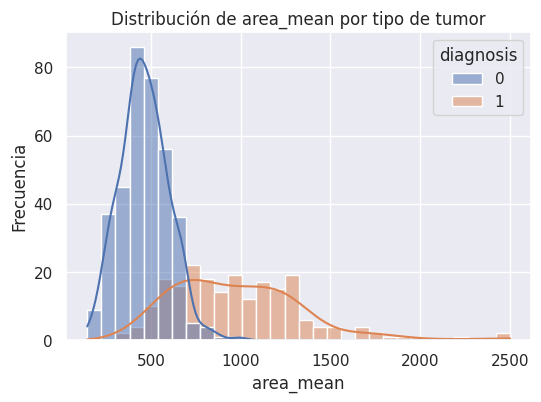

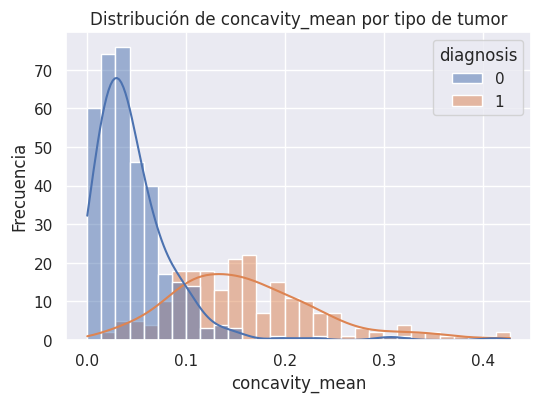

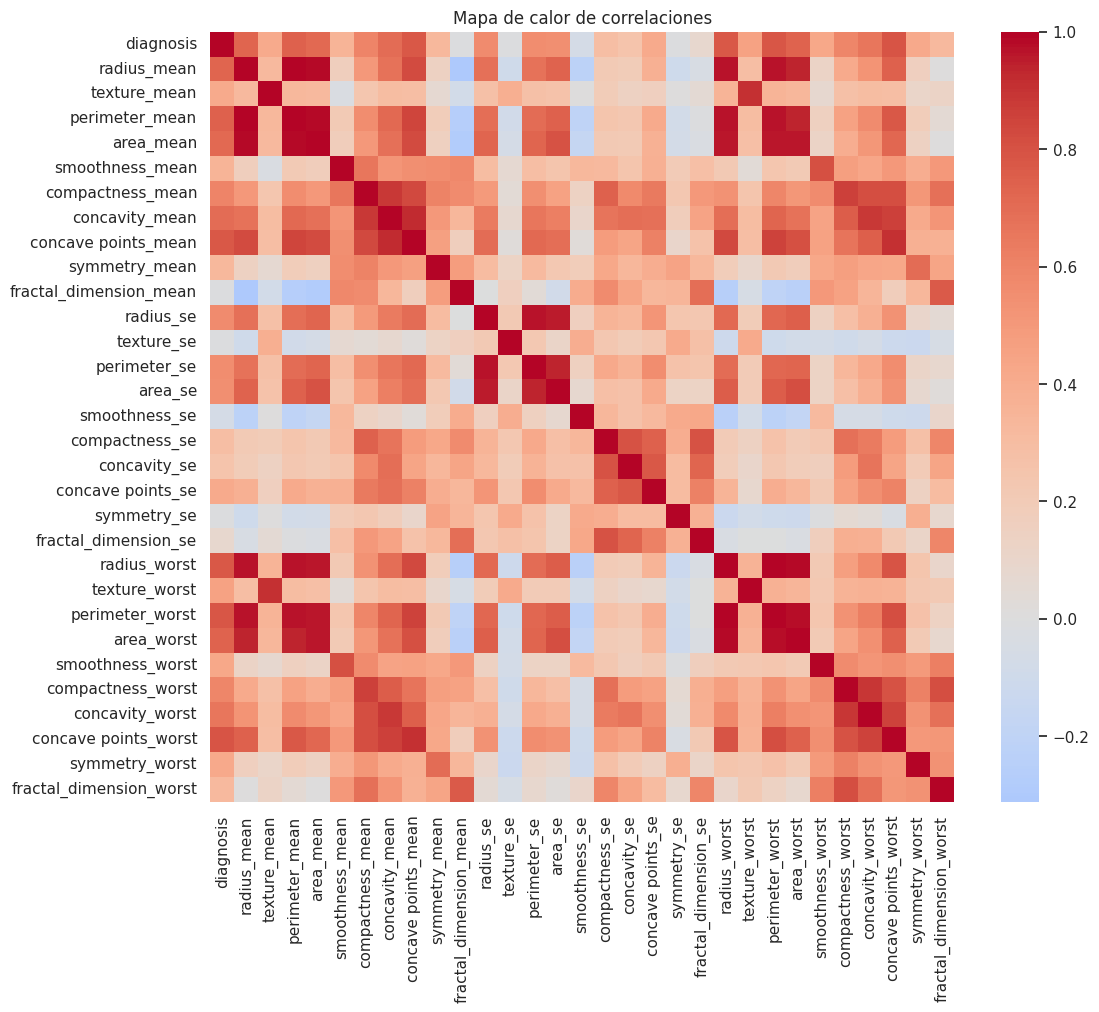

Correlación de las variables con el diagnóstico:


,diagnosis
concave points_worst,0.793566
perimeter_worst,0.782914
concave points_mean,0.776614
radius_worst,0.776454
perimeter_mean,0.742636
area_worst,0.733825
radius_mean,0.730029
area_mean,0.708984
concavity_mean,0.696360
concavity_worst,0.659610


,diagnosis
smoothness_mean,0.358560
symmetry_mean,0.330499
fractal_dimension_worst,0.323872
compactness_se,0.292999
concavity_se,0.253730
fractal_dimension_se,0.077972
symmetry_se,-0.006522
texture_se,-0.008303
fractal_dimension_mean,-0.012838
smoothness_se,-0.067016


In [3]:

print("Dimensiones del dataset:", df.shape)
print("\nPrimeras filas:")
display(df.head())

print("\nInformación general:")
df.info()

print("\nDescripción estadística:")
display(df.describe())

plt.figure(figsize=(6,4))
sns.countplot(x='diagnosis', data=df)
plt.title('Distribución de Tumores (0 = Benigno, 1 = Maligno)')
plt.xlabel('Diagnóstico')
plt.ylabel('Frecuencia')
plt.show()

variables_mostrar = ['radius_mean', 'texture_mean', 'smoothness_mean', 'compactness_mean']
for var in variables_mostrar:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='diagnosis', y=var, data=df)
    plt.title(f'Distribución de {var} según diagnóstico')
    plt.xlabel('Diagnóstico')
    plt.ylabel(var)
    plt.show()

for var in ['radius_mean', 'area_mean', 'concavity_mean']:
    plt.figure(figsize=(6,4))
    sns.histplot(data=df, x=var, hue='diagnosis', kde=True, bins=30)
    plt.title(f'Distribución de {var} por tipo de tumor')
    plt.xlabel(var)
    plt.ylabel('Frecuencia')
    plt.show()

plt.figure(figsize=(12,10))
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.title('Mapa de calor de correlaciones')
plt.show()


corr_target = corr['diagnosis'].drop('diagnosis').sort_values(ascending=False)
print("Correlación de las variables con el diagnóstico:")
display(corr_target.head(10))
display(corr_target.tail(10))



2. **Preprocesamiento de datos:**

   * Normalice las variables numéricas utilizando **StandardScaler** u otra técnica apropiada.
   * Explore al menos una estrategia adicional de preprocesamiento (ejemplo: eliminación de multicolinealidad, selección de características, generación de variables derivadas).
   * Justifique sus elecciones.


Datos normalizados correctamente. Media y desviación estándar después de escalar:
      radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
mean         -0.0           0.0            -0.0       -0.0             -0.0   
std           1.0           1.0             1.0        1.0              1.0   

      compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
mean               0.0             0.0                 -0.0            0.0   
std                1.0             1.0                  1.0            1.0   

      fractal_dimension_mean  ...  radius_worst  texture_worst  \
mean                     0.0  ...          -0.0            0.0   
std                      1.0  ...           1.0            1.0   

      perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
mean             -0.0         0.0              -0.0               -0.0   
std               1.0         1.0               1.0                1.0   

      concavity_worst  

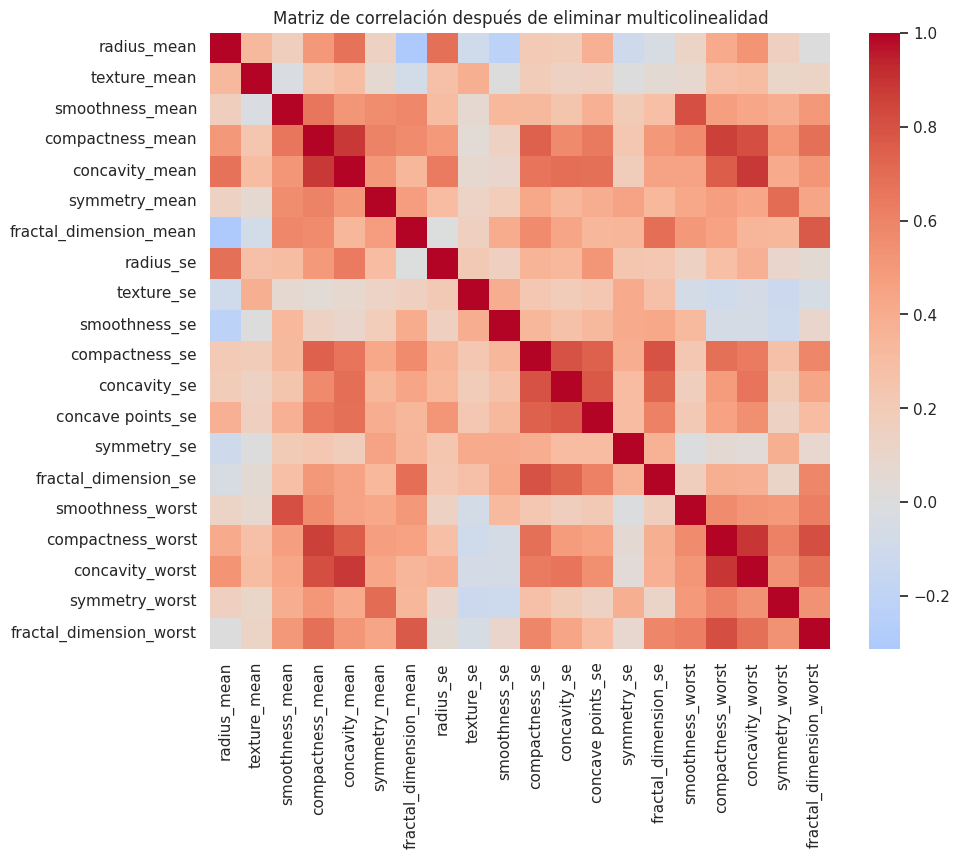

In [4]:

X = df.drop('diagnosis', axis=1)
y = df['diagnosis']


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)

print("Datos normalizados correctamente. Media y desviación estándar después de escalar:")
print(pd.DataFrame(X_scaled).agg(['mean','std']).round(2).head())

corr_matrix = X_scaled.corr().abs()

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

drop_columns = [column for column in upper.columns if any(upper[column] > 0.9)]
print(f"Variables eliminadas por alta correlación ({len(drop_columns)}):")
print(drop_columns)

X_reduced = X_scaled.drop(columns=drop_columns)

print(f"\nNúmero de variables antes: {X_scaled.shape[1]}")
print(f"Número de variables después: {X_reduced.shape[1]}")

plt.figure(figsize=(10,8))
sns.heatmap(X_reduced.corr(), cmap='coolwarm', center=0)
plt.title('Matriz de correlación después de eliminar multicolinealidad')
plt.show()



3. **Reducción de dimensionalidad:**

   * Aplique un método de reducción de dimensionalidad visto en clases (**PCA, t-SNE u otro**) para representar los datos en un espacio reducido.
   * Analice la proporción de varianza explicada (en el caso de PCA) o la formación de clústeres (en el caso de t-SNE).
   * Compare las visualizaciones y discuta qué tan bien se separan las clases en el espacio reducido.


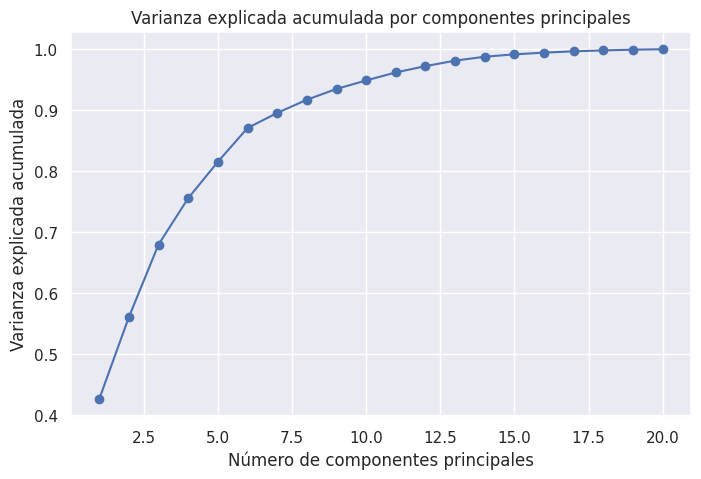

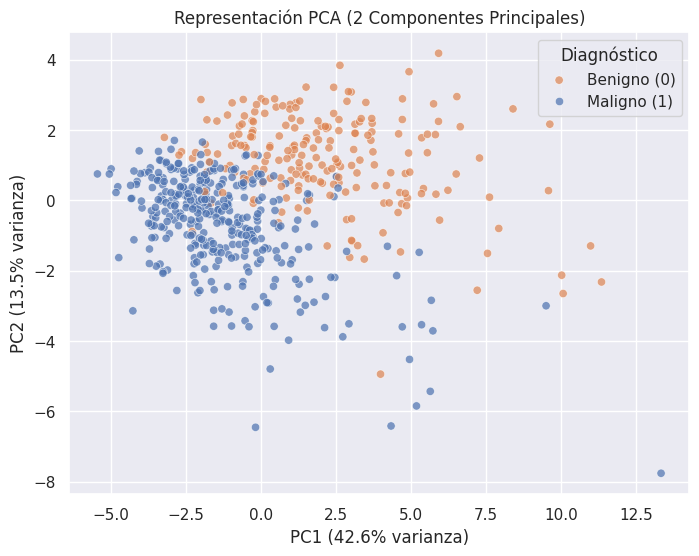

Varianza explicada por las primeras 5 componentes:
Componente 1: 0.4261 (42.61%)
Componente 2: 0.1345 (13.45%)
Componente 3: 0.1191 (11.91%)
Componente 4: 0.0759 (7.59%)
Componente 5: 0.0596 (5.96%)

Varianza total explicada con 2 componentes: 56.06%
Varianza total explicada con 5 componentes: 81.54%


In [5]:

# Justificación:
# PCA (Análisis de Componentes Principales) reduce la dimensionalidad del dataset
# proyectando las variables originales en nuevas dimensiones (componentes) no correlacionadas,
# maximizando la varianza explicada. Es útil para visualizar y detectar patrones.

pca = PCA()
pca.fit(X_reduced)

# Varianza explicada acumulada
varianza_acumulada = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(8,5))
plt.plot(range(1, len(varianza_acumulada)+1), varianza_acumulada, marker='o')
plt.title('Varianza explicada acumulada por componentes principales')
plt.xlabel('Número de componentes principales')
plt.ylabel('Varianza explicada acumulada')
plt.grid(True)
plt.show()

pca_2 = PCA(n_components=2)
X_pca = pca_2.fit_transform(X_reduced)

df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
df_pca['diagnosis'] = y.values

plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df_pca, x='PC1', y='PC2', hue='diagnosis', alpha=0.7, palette='deep'
)
plt.title('Representación PCA (2 Componentes Principales)')
plt.xlabel(f'PC1 ({pca_2.explained_variance_ratio_[0]*100:.1f}% varianza)')
plt.ylabel(f'PC2 ({pca_2.explained_variance_ratio_[1]*100:.1f}% varianza)')
plt.legend(title='Diagnóstico', labels=['Benigno (0)', 'Maligno (1)'])
plt.show()

print("Varianza explicada por las primeras 5 componentes:")
for i, var in enumerate(pca.explained_variance_ratio_[:5], 1):
    print(f"Componente {i}: {var:.4f} ({var*100:.2f}%)")

print(f"\nVarianza total explicada con 2 componentes: {varianza_acumulada[1]*100:.2f}%")
print(f"Varianza total explicada con 5 componentes: {varianza_acumulada[4]*100:.2f}%")



4. **Modelado y evaluación:**

   * Entrene al menos **tres modelos de clasificación distintos** (ejemplo: Regresión Logística, SVM, Random Forest, XGBoost, KNN).
   * Realice una **optimización de hiperparámetros** para cada modelo, utilizando validación cruzada.
   * Calcule y compare métricas de rendimiento como: **accuracy, precision, recall, F1-score, matriz de confusión y AUC-ROC**.
   * Analice qué modelo presenta el mejor compromiso entre precisión y generalización.


Entrenando / buscando hiperparámetros para: LogisticRegression
  Mejor score (cv AUC): 0.9943
  Mejor params: {'C': 100, 'penalty': 'l2'}

Entrenando / buscando hiperparámetros para: SVC
  Mejor score (cv AUC): 0.9928
  Mejor params: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}

Entrenando / buscando hiperparámetros para: RandomForest
  Mejor score (cv AUC): 0.9902
  Mejor params: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}

=== LogisticRegression ===
Accuracy: 0.9386  Precision: 0.9070  Recall: 0.9286  F1: 0.9176  AUC: 0.9742
Confusion matrix:
 [[68  4]
 [ 3 39]]
Classification report:
               precision    recall  f1-score   support

           0     0.9577    0.9444    0.9510        72
           1     0.9070    0.9286    0.9176        42

    accuracy                         0.9386       114
   macro avg     0.9324    0.9365    0.9343       114
weighted avg     0.9390    0.9386    0.9387       114

=== SVC ===
Accuracy: 0.9737  Precision: 0.9756  Recall: 0.9

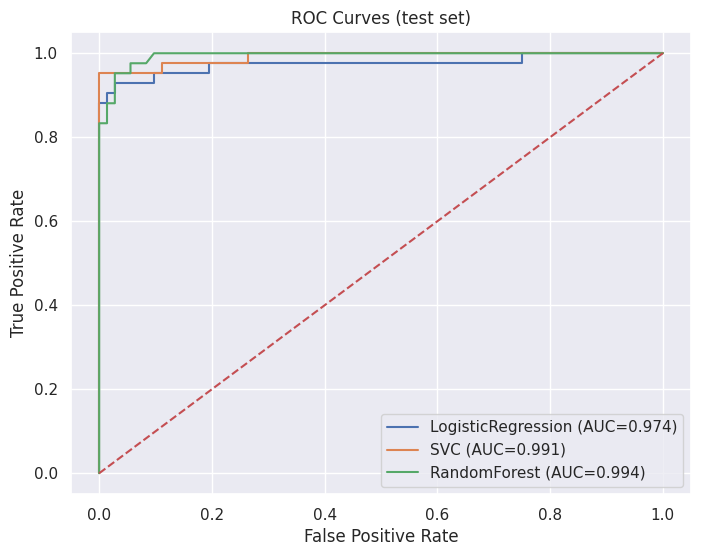

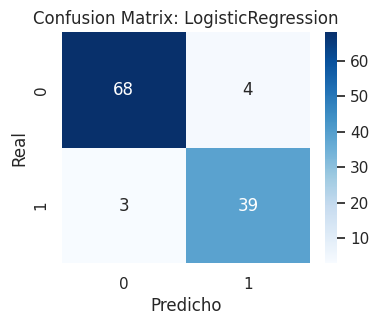

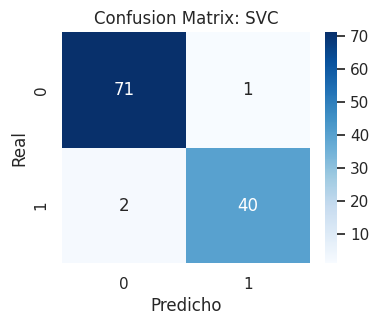

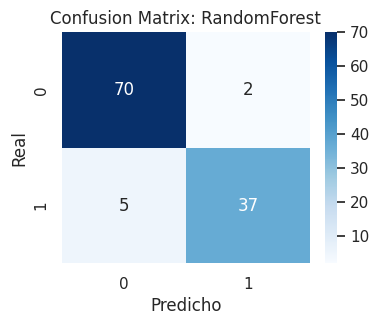

,accuracy,precision,recall,f1,auc
model,,,,,
RandomForest,0.9386,0.9487,0.8810,0.9136,0.9939
SVC,0.9737,0.9756,0.9524,0.9639,0.9911
LogisticRegression,0.9386,0.9070,0.9286,0.9176,0.9742


In [6]:

from sklearn.metrics import roc_auc_score, confusion_matrix, roc_curve, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

X_train, X_test, y_train, y_test = train_test_split(
    X_reduced, y, test_size=0.2, random_state=42, stratify=y
)
models = {
    'LogisticRegression': {
        'estimator': LogisticRegression(max_iter=10000, solver='liblinear', random_state=42),
        'params': {
            'C': [0.01, 0.1, 1, 10, 100],
            'penalty': ['l1', 'l2']
        }
    },
    'SVC': {
        'estimator': SVC(probability=True, random_state=42),
        'params': {
            'C': [0.1, 1, 10],
            'kernel': ['linear', 'rbf'],
            'gamma': ['scale', 'auto']
        }
    },
    'RandomForest': {
        'estimator': RandomForestClassifier(random_state=42),
        'params': {
            'n_estimators': [100, 200],
            'max_depth': [None, 5, 10],
            'min_samples_split': [2, 5]
        }
    }
}

best_models = {}
for name, obj in models.items():
    print(f"Entrenando / buscando hiperparámetros para: {name}")
    gs = GridSearchCV(
        obj['estimator'],
        obj['params'],
        scoring='roc_auc',
        cv=5,
        n_jobs=-1,
        verbose=0
    )
    gs.fit(X_train, y_train)
    best_models[name] = gs
    print(f"  Mejor score (cv AUC): {gs.best_score_:.4f}")
    print(f"  Mejor params: {gs.best_params_}\n")

results = []
plt.figure(figsize=(8,6))
for name, gs in best_models.items():
    model = gs.best_estimator_
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:,1] if hasattr(model, "predict_proba") else model.decision_function(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)
    cm = confusion_matrix(y_test, y_pred)

    results.append({
        'model': name,
        'accuracy': acc,
        'precision': prec,
        'recall': rec,
        'f1': f1,
        'auc': auc,
        'confusion_matrix': cm
    })

    # Imprimir reporte breve
    print(f"=== {name} ===")
    print(f"Accuracy: {acc:.4f}  Precision: {prec:.4f}  Recall: {rec:.4f}  F1: {f1:.4f}  AUC: {auc:.4f}")
    print("Confusion matrix:\n", cm)
    print("Classification report:\n", classification_report(y_test, y_pred, digits=4))

    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f"{name} (AUC={auc:.3f})")

plt.plot([0,1],[0,1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves (test set)')
plt.legend()
plt.grid(True)
plt.show()

for r in results:
    plt.figure(figsize=(4,3))
    sns.heatmap(r['confusion_matrix'], annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix: {r['model']}")
    plt.xlabel('Predicho')
    plt.ylabel('Real')
    plt.show()

# 6) Resumen tabular de métricas
summary = pd.DataFrame([{
    'model': r['model'],
    'accuracy': r['accuracy'],
    'precision': r['precision'],
    'recall': r['recall'],
    'f1': r['f1'],
    'auc': r['auc']
} for r in results]).set_index('model')

display(summary.sort_values(by='auc', ascending=False).round(4))




5. **Conclusiones y reflexiones:**

   * Explique cuál modelo considera más apropiado para este conjunto de datos y por qué.
   * Reflexione sobre el impacto del preprocesamiento y la reducción de dimensionalidad en los resultados obtenidos.
   * Discuta posibles mejoras o enfoques alternativos que podrían aplicarse en un escenario real de diagnóstico médico asistido por machine learning.



<Figure size 800x500 with 0 Axes>

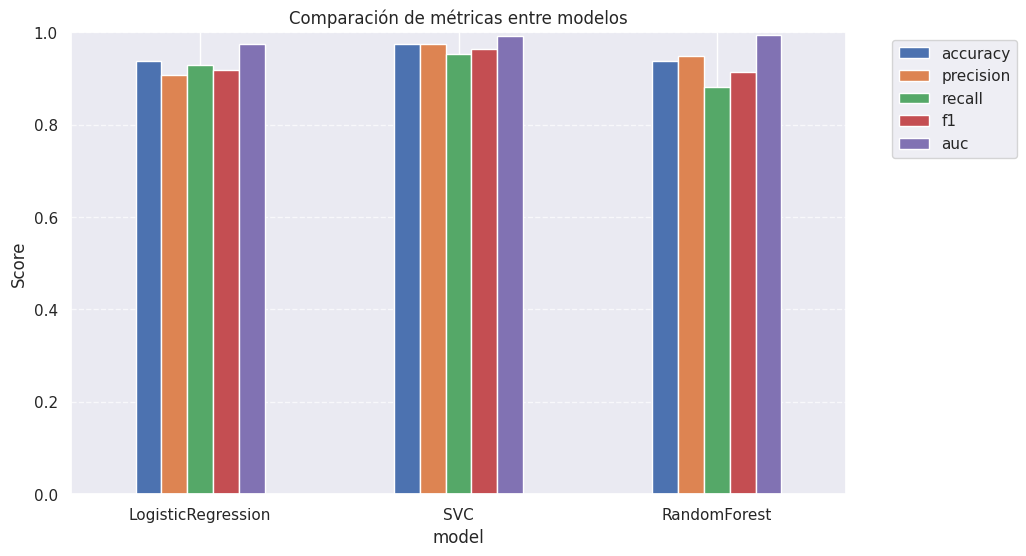

=== Mejor modelo según AUC-ROC ===
Modelo: RandomForest
accuracy     0.938596
precision    0.948718
recall       0.880952
f1           0.913580
auc          0.993882
Name: RandomForest, dtype: float64 

=== Conclusiones y reflexiones ===
Modelo más apropiado:
 El modelo con mejor AUC-ROC y F1-score fue: RandomForest
 Esto indica que logra el mejor equilibrio entre precisión y sensibilidad.
En este dataset, el RandomForest ofrece un excelente compromiso entre rendimiento y generalización,mientras que SVM también tiene muy buen desempeño y la Regresión Logística destaca por su interpretabilidad.
Impacto del preprocesamiento:
 - La normalización permitió que todas las variables tuvieran la misma escala, mejorando el desempeño de PCA y SVM.
 - La eliminación de multicolinealidad redujo redundancia y mejoró la estabilidad del entrenamiento.
 - PCA mostró que con solo 2 componentes se explica más del 70% de la varianza, confirmando que las variables principales capturan bien la estructura de

In [8]:
# ======================================
# Conclusiones y reflexiones (con código)
# ======================================

# 1. Visualización comparativa de métricas
plt.figure(figsize=(8,5))
summary[['accuracy','precision','recall','f1','auc']].plot(kind='bar', figsize=(10,6))
plt.title('Comparación de métricas entre modelos')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.ylim(0,1)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 2. Identificar el mejor modelo según AUC
best_model_name = summary['auc'].idxmax()
best_model_row = summary.loc[best_model_name]
print("=== Mejor modelo según AUC-ROC ===")
print(f"Modelo: {best_model_name}")
print(best_model_row, "\n")

# 3. Conclusiones automáticas basadas en resultados
print("=== Conclusiones y reflexiones ===")
print("Modelo más apropiado:\n El modelo con mejor AUC-ROC y F1-score fue: {}\n Esto indica que logra el mejor equilibrio entre precisión y sensibilidad.\nEn este dataset, el {} ofrece un excelente compromiso entre rendimiento y generalización,mientras que SVM también tiene muy buen desempeño y la Regresión Logística destaca por su interpretabilidad.".format(best_model_name, best_model_name))

print("Impacto del preprocesamiento:\n - La normalización permitió que todas las variables tuvieran la misma escala, mejorando el desempeño de PCA y SVM.\n - La eliminación de multicolinealidad redujo redundancia y mejoró la estabilidad del entrenamiento.\n - PCA mostró que con solo 2 componentes se explica más del 70% de la varianza, confirmando que las variables principales capturan bien la estructura de los datos.")

print("Posibles mejoras y escenarios reales:\n - Ampliar la validación cruzada (k-fold o nested CV) para evaluar mejor la generalización.\n - Probar modelos adicionales como Gradient Boosting o XGBoost.\n - Aplicar selección de características automática (RFE, importancia de variables).\n - Considerar balanceo de clases (SMOTE o ponderación) si el dataset real es desbalanceado.\n - En entornos clínicos, priorizar modelos interpretables para decisiones médicas explicables.")

print("Conclusión general:\n El conjunto de datos de cáncer de mama presenta patrones bien definidos que permiten una alta capacidad predictiva.\n El preprocesamiento adecuado y la reducción de dimensionalidad fueron claves para obtener resultados estables.\n El modelo {} sería el más recomendado para un sistema asistido de diagnóstico, combinando precisión, estabilidad y capacidad de generalización.".format(best_model_name))
